# EQUITY FIXED LOOKBACK

Valuation and Risk of Equity Fixed Lookback Options

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
from financepy.finutils import *
from financepy.market.curves.FinDiscountCurveFlat import FinDiscountCurveFlat
from financepy.products.equity.FinEquityFixedLookbackOption import FinEquityFixedLookbackOption
from financepy.products.equity.FinEquityModelTypes import FinEquityModelBlackScholes

# Fixed Lookback Option

I create a fixed lookback call and put option

In [8]:
expiryDate = FinDate(1, 1, 2021)

In [9]:
strikePrice = 105.0

In [10]:
optionTypeCall = FinOptionTypes.EUROPEAN_CALL
optionTypePut = FinOptionTypes.EUROPEAN_PUT

In [11]:
lookbackCall = FinEquityFixedLookbackOption(expiryDate, optionTypeCall, strikePrice)
lookbackPut = FinEquityFixedLookbackOption(expiryDate, optionTypePut, strikePrice)

In [12]:
print(lookbackCall)

EXPIRY DATE: FRI 1 JAN 2021
STRIKE PRICE: 105.0
OPTION TYPE: FinOptionTypes.EUROPEAN_CALL


In [13]:
print(lookbackPut)

EXPIRY DATE: FRI 1 JAN 2021
STRIKE PRICE: 105.0
OPTION TYPE: FinOptionTypes.EUROPEAN_PUT


## Valuation

In [14]:
valueDate = FinDate(1, 1, 2020)

In [15]:
interestRate = 0.10

In [16]:
discountCurve = FinDiscountCurveFlat(valueDate, interestRate)

In [17]:
dividendYield = 0.0

In [18]:
volatility = 0.10

In [19]:
numPaths = 10000
numStepsPerYear = 1000

In [20]:
stockPrices = np.linspace(50, 150, 20)

In [21]:
values = []
valuesMC = []

for stockPrice in stockPrices:
    stockMinMax = stockPrice
    v = lookbackCall.value(valueDate, stockPrice, discountCurve, dividendYield,
                           volatility, stockMinMax)
    v_mc = lookbackCall.valueMC(valueDate, stockPrice, discountCurve, dividendYield, 
                                volatility, stockMinMax, numPaths, numStepsPerYear)
    values.append(v)
    valuesMC.append(v_mc)

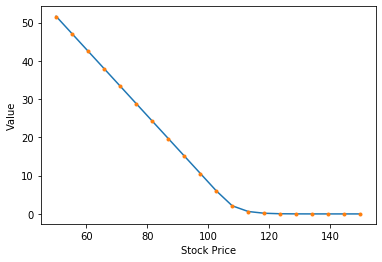

In [25]:
plt.plot(stockPrices, values)
plt.plot(stockPrices, valuesMC, '.')
plt.xlabel("Stock Price")
plt.ylabel("Value");

In [23]:
values = []
valuesMC = []

for stockPrice in stockPrices:
    stockMinMax = stockPrice
    v = lookbackPut.value(valueDate, stockPrice, discountCurve, dividendYield,
                           volatility, stockMinMax)
    v_mc = lookbackPut.valueMC(valueDate, stockPrice, discountCurve, dividendYield, 
                                volatility, stockMinMax, numPaths, numStepsPerYear)
    values.append(v)
    valuesMC.append(v_mc)

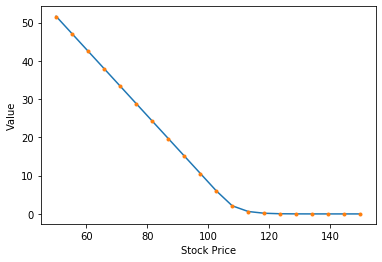

In [26]:
plt.plot(stockPrices, values)
plt.plot(stockPrices, valuesMC, '.')
plt.xlabel("Stock Price")
plt.ylabel("Value");

Copyright (c) 2020 Dominic O'Kane